In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
class Cluster:
    def __init__(self,L):
        self.L = L
        self.initial = (np.random.randint(L), np.random.randint(L))
        self.lattice = np.zeros((L+2,L+2))
        self.lattice[self.initial]=1
        self.neighbors = [self.initial]

In [225]:
def cluster_grow(cluster,p, step):
    
    lattice = cluster.lattice
    L = lattice.shape[0]
    #x = np.random.randint(L)
    #y = np.random.randint(L)
    
    neighbors = cluster.neighbors
    
    flag = 0
    counter=0
    for x,y in neighbors:
        
        if counter>step:
            #print(counter)
            cluster.lattice = lattice
            cluster.neighbors = neighbors
            break
            
        else:
            #counter+=1
            if x>0 and y>0 and x<L-1 and y<L-1 :
                #plt.imshow(lattice)
                #print(neighbors)
                
                if lattice[x-1,y]==0:
                    rand = np.random.random()
                    if rand<p:
                        lattice[x-1,y]=1
                        neighbors.append((x-1,y))
                        counter+=1

                if lattice[x+1,y]==0:
                    rand = np.random.random()
                    if rand<p:
                        lattice[x+1,y]=1
                        neighbors.append((x+1,y))
                        counter+=1

                if lattice[x,y-1]==0:
                    rand = np.random.random()
                    if rand<p:
                        lattice[x,y-1]=1
                        neighbors.append((x,y-1))
                        counter+=1
                        
                if lattice[x,y+1]==0:
                    rand = np.random.random()
                    if rand<p:
                        lattice[x,y+1]=1
                        neighbors.append((x,y+1))
                        counter+=1
                        
            else:
                print('the boudary is reached')
                flag = 1
                return lattice, flag 
            
    return lattice, flag

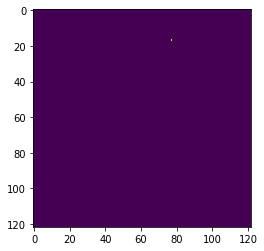

In [230]:
L=120
cluster = Cluster(120)
plt.imshow(cluster.lattice)

the boudary is reached
436.0 312


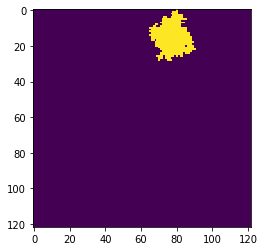

In [231]:
cluster_size=0
iteration = 0
while cluster_size <1000:
    lattice, flag = cluster_grow(cluster,0.02,10)
    if flag==1:
        break
    cluster_size = lattice.sum()
    iteration+=1
plt.imshow(lattice)
print(lattice.sum(), iteration)